# Analiza eksploracyjna danych

In [2]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [3]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features
y = heart_disease.data.targets

data = X.join(y)
  
print(heart_disease.variables) 


        name     role         type demographic  \
0        age  Feature      Integer         Age   
1        sex  Feature  Categorical         Sex   
2         cp  Feature  Categorical        None   
3   trestbps  Feature      Integer        None   
4       chol  Feature      Integer        None   
5        fbs  Feature  Categorical        None   
6    restecg  Feature  Categorical        None   
7    thalach  Feature      Integer        None   
8      exang  Feature  Categorical        None   
9    oldpeak  Feature      Integer        None   
10     slope  Feature  Categorical        None   
11        ca  Feature      Integer        None   
12      thal  Feature  Categorical        None   
13       num   Target      Integer        None   

                                          description  units missing_values  
0                                                None  years             no  
1                                                None   None             no  
2              

In [4]:
X.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000


Zauważalne są brakującą dane ca oraz thal ze względu na to że wartość `ca` (liczbą głównych naczyń (0-3) zabarwionych fluorosopią) jest liczbą naturalną, uśrednianie nie wydaje się być najlepszą decyzją, zbadany zostanie rozkład a następnie zostanie podjęta decyzja w sprawie tej brakującej danej. Natomiast `thal` jest zmienną kategoryczną w której występują 3 typy danych (3, 4, 7) w objaśnieniu znaleziono wyjaśnienia tych wartości:
 - 3 = normal;
 - 6 = fixed defect;
 - 7 = reversable defect

Zmienną `thal` należy rozważyć pod kątem wpływu na wynik diagnozy i podjąć decyjzę o ewentualnym zastąpieniu brakujących wartości najbardziej popularnymi.

In [5]:
y.describe()

,num
count,303.000000
mean,0.937294
std,1.228536
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,4.000000


### Rozkład diagnoz

<Axes: title={'center': 'Rozkład diagnoz'}, ylabel='count'>

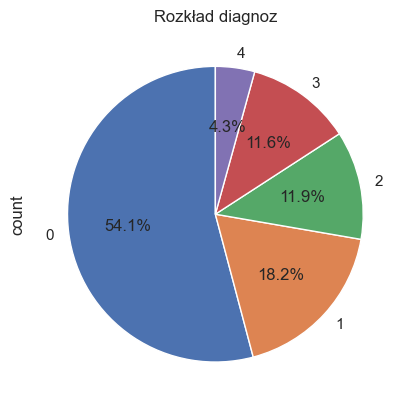

In [6]:
labels = y.value_counts().index

values_counts = y.value_counts()
values_counts.plot(kind='pie', labels=[x[0] for x in values_counts.index.tolist()], autopct='%1.1f%%', startangle=90, title='Rozkład diagnoz')

W przypadku większości innych badań na zbiorze danych ograniczono się jedynie do stwerdzenia istnienia choroby serca. Rożróznienie wartości 0 lub innej. W takim przypadku zbiór danych jest stosunkowo zbalasnowany. Natomiast w przypadku uwzględnienia klasyfikacji różnych chorób zbiór ten już nie jest zbalansowany. Co może skutkować niższą dokładnością modelu

In [7]:
numerical_data = X[["age", "trestbps", "chol", "thalach", "oldpeak", "ca"]]
categorical_data = X[["sex", "cp", "fbs", "restecg", "exang", "slope", "thal"]].join(y)

# Korelacja

<Axes: title={'center': 'Korelacja atrybutów zbioru danych wraz z diagnozą (num)'}>

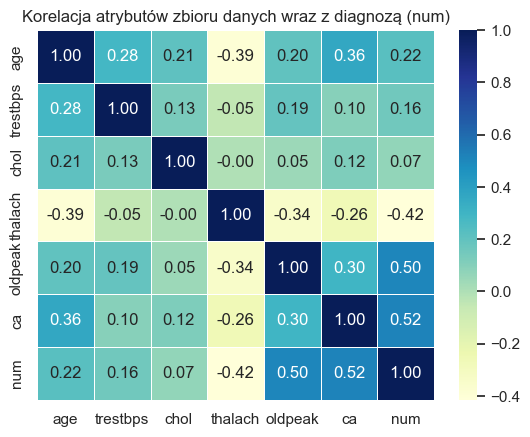

In [8]:
data = X.join(y)

plt.title("Korelacja atrybutów zbioru danych wraz z diagnozą (num)")
sns.heatmap(pd.DataFrame(numerical_data.join(y)).corr(), annot=True, fmt=".2f", linewidths=.5, cmap='YlGnBu')



# Rozkłady wartości ciągłych

In [9]:
numerical_data.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604,0.672241
std,9.038662,17.599748,51.776918,22.875003,1.161075,0.937438
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,275.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


Text(0.5, 1.0, 'Rozkład liczby głównych naczyń (0-3) zabarwionych fluorosopią (ca)')

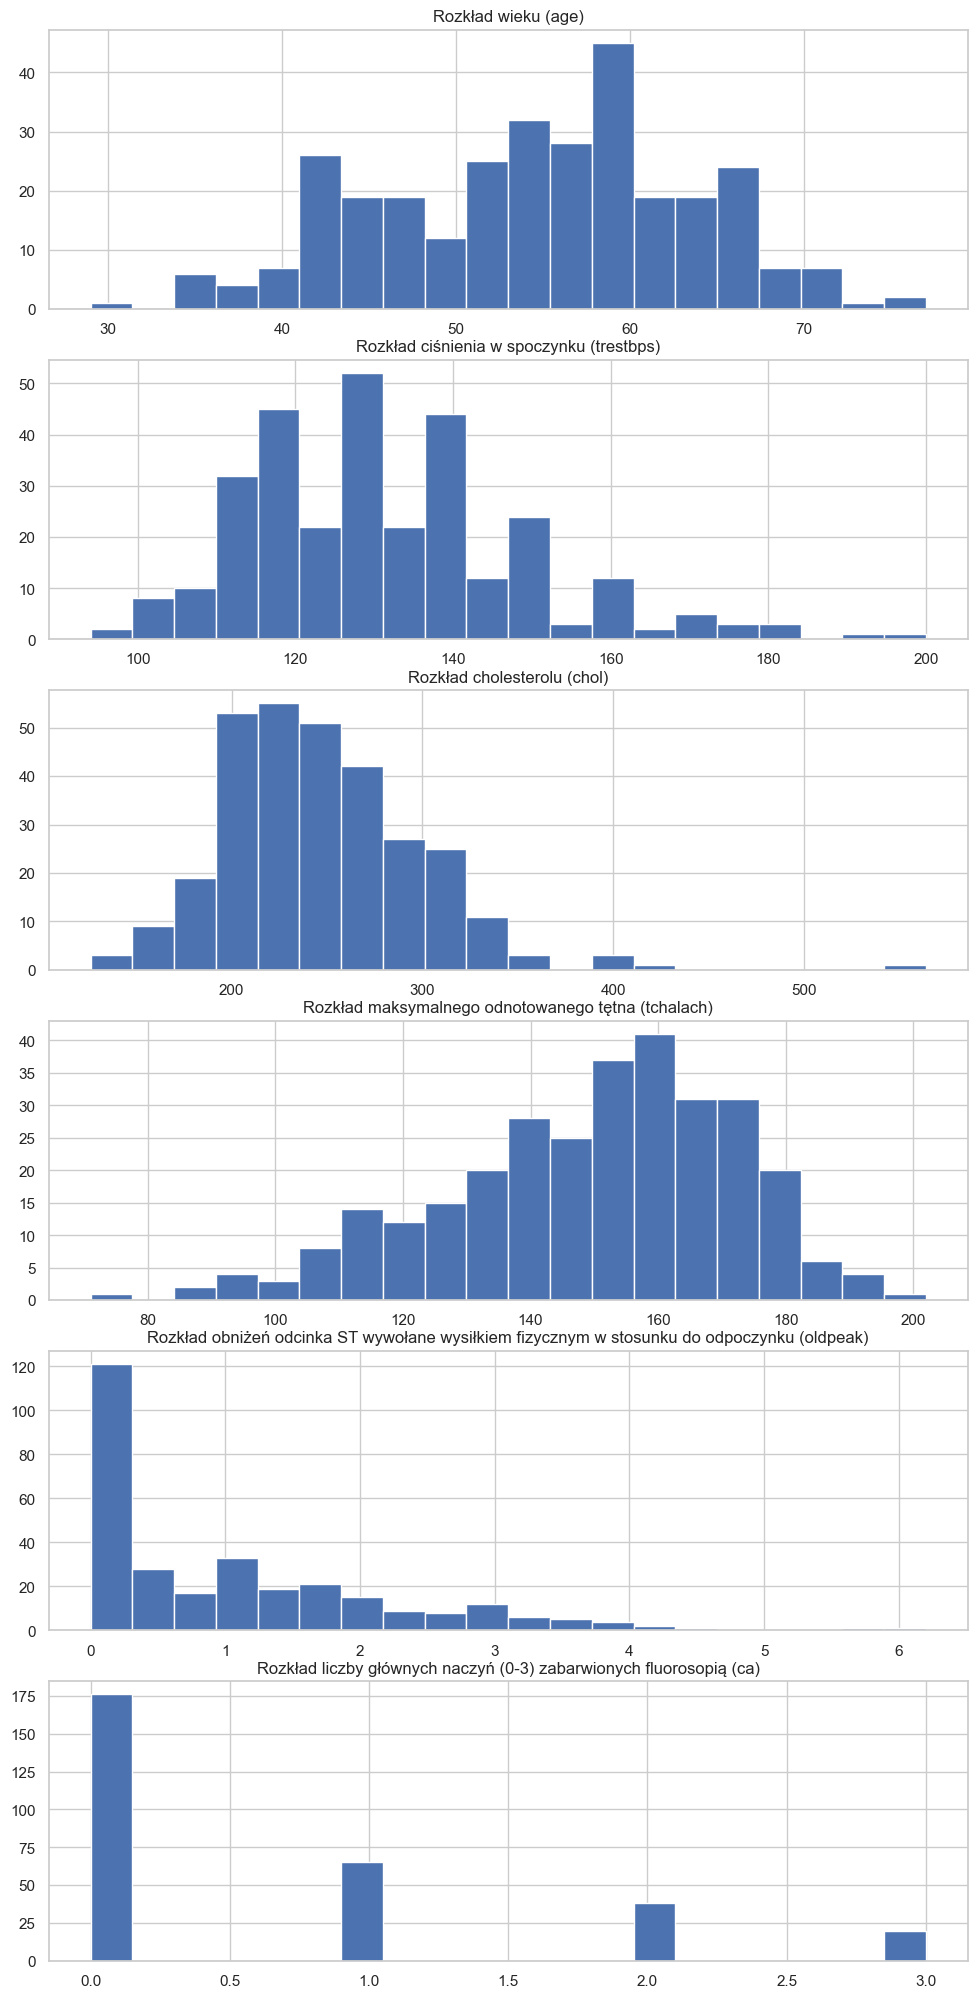

In [10]:
fig, ax = plt.subplots(6, 1, figsize=(10,20))
fig.tight_layout()
ax[0].hist(X.age, bins=20)
ax[0].set_title("Rozkład wieku (age)")
ax[1].hist(X.trestbps, bins=20)
ax[1].set_title("Rozkład ciśnienia w spoczynku (trestbps)")
ax[2].hist(X.chol, bins=20)
ax[2].set_title("Rozkład cholesterolu (chol)")
ax[3].hist(X.thalach, bins=20)
ax[3].set_title("Rozkład maksymalnego odnotowanego tętna (tchalach)")
ax[4].hist(X.oldpeak, bins=20)
ax[4].set_title("Rozkład obniżeń odcinka ST wywołane wysiłkiem fizycznym w stosunku do odpoczynku (oldpeak)")
ax[5].hist(X.ca, bins=20)
ax[5].set_title("Rozkład liczby głównych naczyń (0-3) zabarwionych fluorosopią (ca)")



### Uwagi
W przypadku cholesterolu zauważono wartość znacząco odstającą wynoszącą 564, ponad dwukrotnie większą od obserwowanej średniej. Zdecydowano się nie podejmować żadnych akcji, ze względu na niewielką korelację zmiennej `chol` z diagnozą. Podczas analizy wyników sieci w przyszłości, rozważona zostanie windoryzacja (*ang. Winsorizing*) 

## Testy na rozkład normalny
Przeprowadzono również testy statystyczne na rozkład normalny. Testem poddano zmienne: age, terstbps, chol, tchalach. Zdecydowano się przeprowadzić test Shapiro-Wilka


In [11]:
from scipy.stats import normaltest

def test_normality(data, variable_name, alpha=0.05):
    stat, p = normaltest(data)
    print('='*12)
    print('Statystyka=%.3f, p=%.3f' % (stat, p))
    if p > alpha:
        print(f'Zmienna numeryczna "{variable_name}" jest rozkładem normalnym na poziomie istotności alpha={alpha}')
    else:
        print(f'Zmienna numerczyna "{variable_name}" nie jest rozkładem normalnym na poziomie istotności alpha={alpha}')

for column in numerical_data.columns:
    test_normality(numerical_data[column], column)

Statystyka=8.243, p=0.016
Zmienna numerczyna "age" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=27.695, p=0.000
Zmienna numerczyna "trestbps" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=82.947, p=0.000
Zmienna numerczyna "chol" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=13.463, p=0.001
Zmienna numerczyna "thalach" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=66.620, p=0.000
Zmienna numerczyna "oldpeak" nie jest rozkładem normalnym na poziomie istotności alpha=0.05
Statystyka=nan, p=nan
Zmienna numerczyna "ca" nie jest rozkładem normalnym na poziomie istotności alpha=0.05


Żadna ze zmiennych numerycznych nie okazała się być rozkładem normalnym

# Rozkłady zmiennych kategorycznych

Text(0.5, 1.0, 'Rozkład diagnoz')

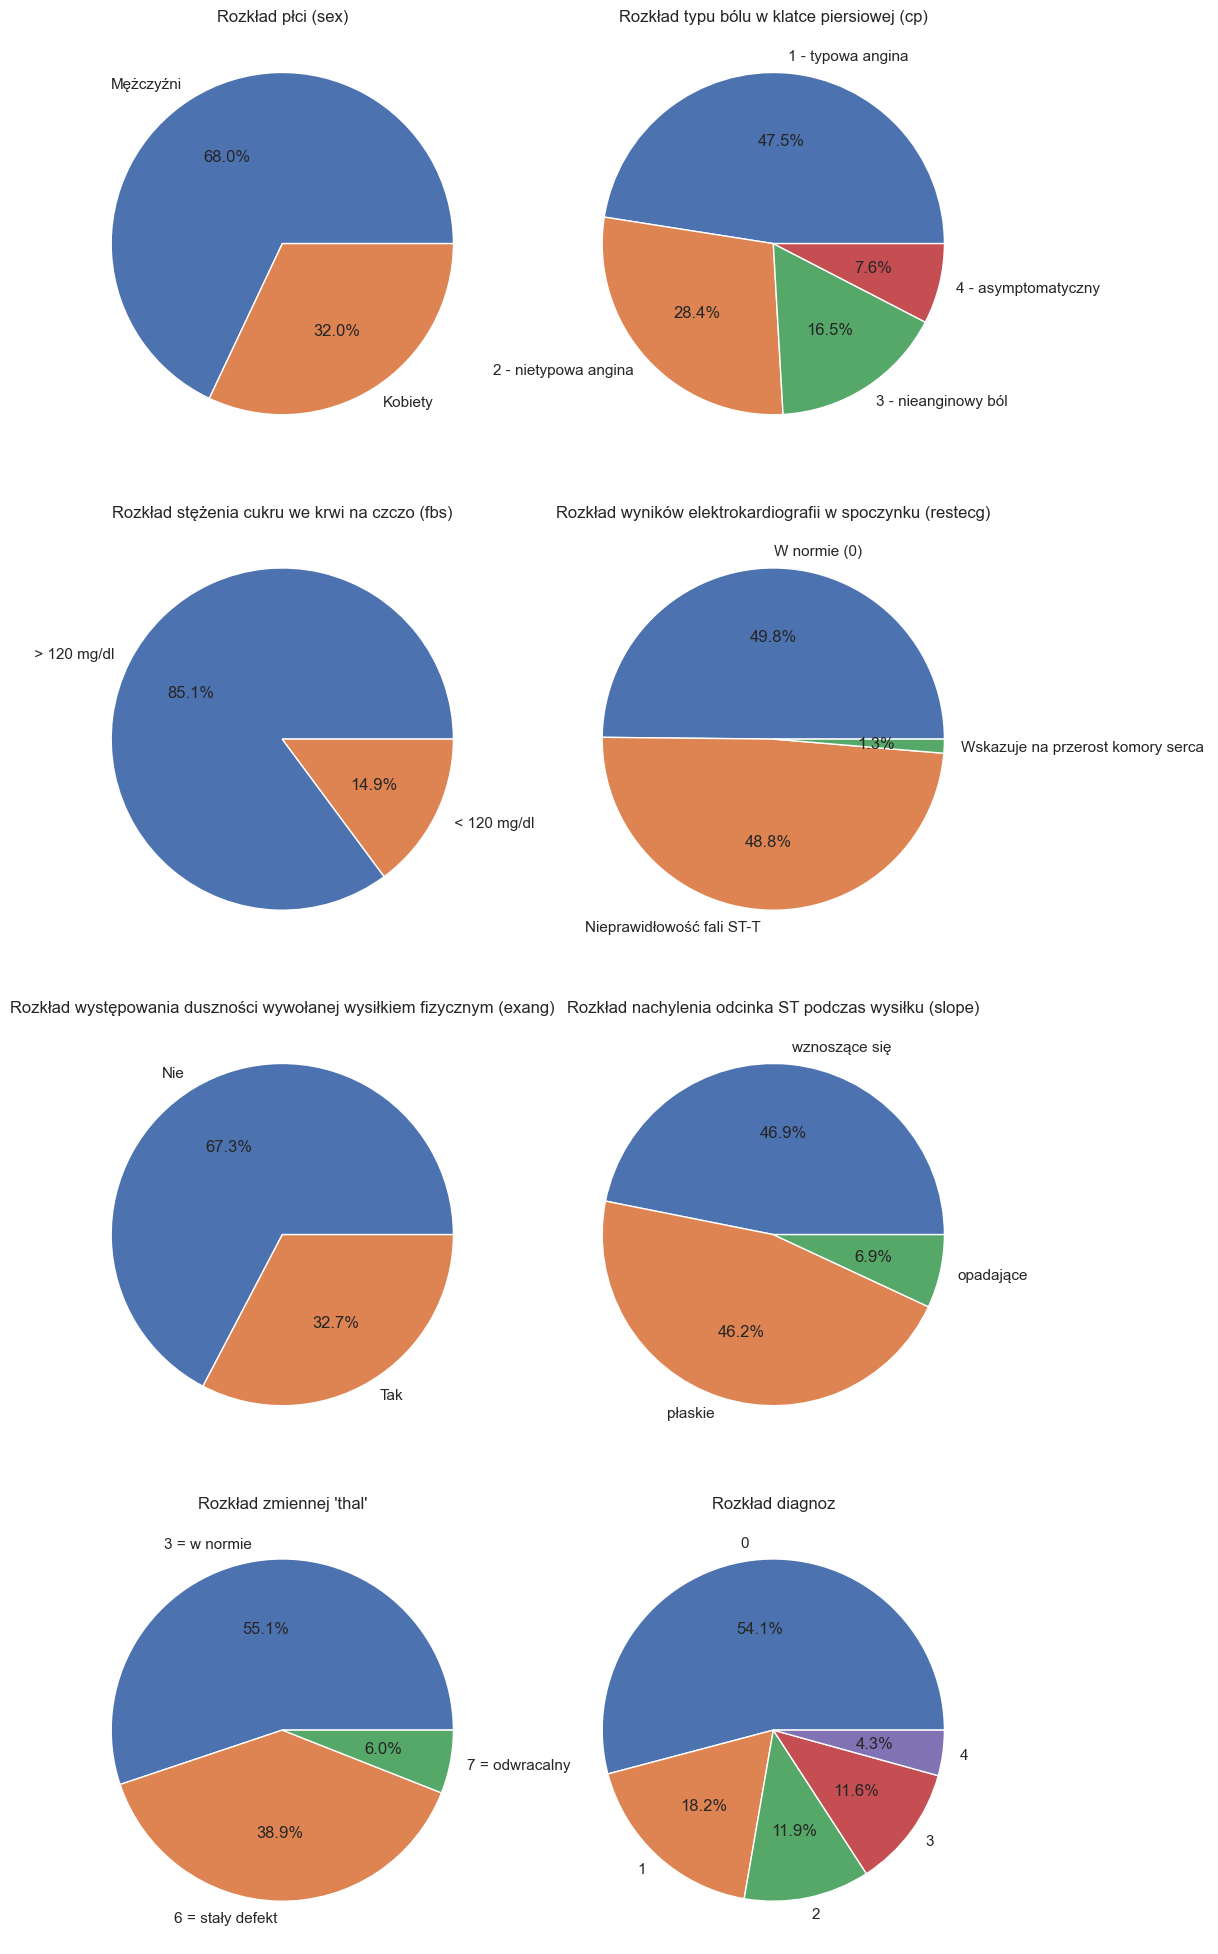

In [12]:
fig, ax = plt.subplots(4, 2, figsize=(10,20))
fig.tight_layout()
ax[0][0].pie(X['sex'].value_counts(), labels=['Mężczyźni', 'Kobiety'], autopct='%1.1f%%')
ax[0][0].set_title("Rozkład płci (sex)")
ax[0][1].pie(X['cp'].value_counts(), labels=['1 - typowa angina', '2 - nietypowa angina', '3 - nieanginowy ból ', '4 - asymptomatyczny'], autopct='%1.1f%%')
ax[0][1].set_title("Rozkład typu bólu w klatce piersiowej (cp)")
ax[1][0].pie(X['fbs'].value_counts(), labels=[' > 120 mg/dl', ' < 120 mg/dl'], autopct='%1.1f%%')
ax[1][0].set_title("Rozkład stężenia cukru we krwi na czczo (fbs)")
ax[1][1].pie(X['restecg'].value_counts(), labels=['W normie (0)', 'Nieprawidłowość fali ST-T ', 'Wskazuje na przerost komory serca '], autopct='%1.1f%%')
ax[1][1].set_title("Rozkład wyników elektrokardiografii w spoczynku (restecg)")
ax[2][0].pie(X['exang'].value_counts(), labels=['Nie', 'Tak'], autopct='%1.1f%%')
ax[2][0].set_title("Rozkład występowania duszności wywołanej wysiłkiem fizycznym (exang)")
ax[2][1].pie(X['slope'].value_counts(), labels=['wznoszące się', 'płaskie', 'opadające'], autopct='%1.1f%%')
ax[2][1].set_title("Rozkład nachylenia odcinka ST podczas wysiłku (slope)")
ax[3][0].pie(X['thal'].value_counts(), labels=["3 = w normie",  "6 = stały defekt",  "7 = odwracalny"], autopct='%1.1f%%')
ax[3][0].set_title("Rozkład zmiennej 'thal'")
ax[3][1].pie(y.value_counts(), labels=[x[0] for x in y.value_counts().index.tolist()], autopct='%1.1f%%')
ax[3][1].set_title("Rozkład diagnoz")

W zmiennej restecg zauważalny jest niewielki udział, wskazujący na przerost komory serca stanowią ok. 1% wszystkich próbek

## Test V Crammera dla zmiennych kategorycznych i diagnoz

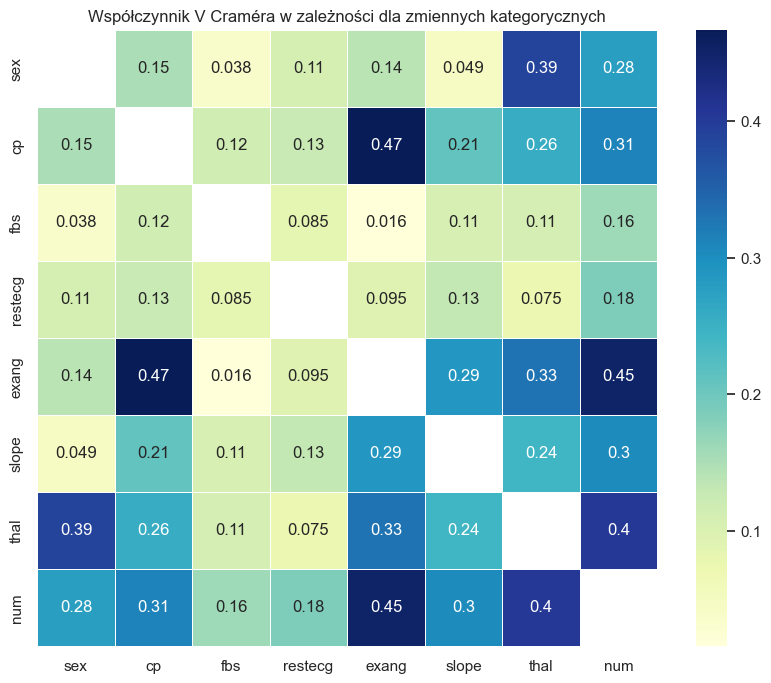

In [13]:
from scipy.stats import chi2_contingency

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))

def calculate_association(df, var1, var2):
    contingency_table = pd.crosstab(df[var1], df[var2])
    cramers_v_value = cramers_v(contingency_table)
    return cramers_v_value

categorical_data_headers = categorical_data.columns
matrix = np.zeros((len(categorical_data_headers), len(categorical_data_headers)))

for i, var1 in enumerate(categorical_data_headers ):
    for j, var2 in enumerate(categorical_data_headers):
        if i != j:
            matrix[i, j] = calculate_association(categorical_data, var1, var2)
        else:
            matrix[i, j] = np.nan

cramers_v_df = pd.DataFrame(matrix, columns=categorical_data_headers, index=categorical_data_headers)

plt.figure(figsize=(10, 8))

sns.heatmap(cramers_v_df, annot=True, cmap="YlGnBu", cbar=True, linewidths=.5).axes.grid(False)
plt.title("Współczynnik V Craméra w zależności dla zmiennych kategorycznych")
plt.show()

W wyniku testu V Cramera zauważalny są średnie związki z diagnozą w przypadku zmiennych:
- `thal` - 0.4
- `exang` - 0.45 

Przy czym wykazują one nieco mniejszy związek ze sobą (0.33)
Nieco słabszy związek z diagnozą występuje w przypadku zmiennych:
- `cp` 0.31, przy czym wykazuje średni związek ze zmienną `exang` - 0.47 (największy z obserwowanych)
- `slope` - 0.3, wykazuje również słabe związki z pozostałymi zmiennymi (nieprzekraczające 0.29)
- `sex` - 0.28, przy czym wykazuje średni związek z `thal`

Najsłabsze związki z diagnozą dotyczą zmiennych:
- `fbs` - 0.16
- `restecg` - 0.18


# Wypełnienie brakujących danych 
Brakujące zmienne w przypadku `thal` oraz `ca` zdecydowano zastąpić modą, najpopularniejszą wartością

In [14]:
most_common_thal = X.thal.value_counts().idxmax()
X["thal"].fillna(most_common_thal, inplace=True)


most_common_ca = X.ca.value_counts().idxmax()
X["ca"].fillna(most_common_ca, inplace=True)

C:\Users\dawid\AppData\Local\Temp\ipykernel_34092\823200951.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X["thal"].fillna(most_common_thal, inplace=True)
C:\Users\dawid\AppData\Local\Temp\ipykernel_34092\823200951.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["thal"].fillna(most_common_thal, inplace=True)
C:\Users\dawid\AppData\

# Kodowanie danych oraz reprezentacja w postaci macierzy
Zdecydowano się pozostawić dane X w 2 formatach skalowanie MinMax oraz bez. Ze względu że zmienne te nie są rozkładem normalnym nie zastosowano skalowania StandarScale 
Również zdecydowano się nie skalować kolumny ca, gdyż są to liczby całkowite z przedziału [0, 3], nie zakodowano ich również z użyciem OneHot.

W przypadku zmiennych kategorycznych wartości posiadających więcej niż 2 wartości zdecydowano się zastosować OneHotEncoding (zmienne te reprezentowane liczbowo nie tworzą logicznej sekwencji, mogą więc wpłynąć negatywnie na jakość modelu)

Zmienne kategoryczne z więcej niż jedną wartością:
- `cp` - 4 różne wartości
- `restecg` - 3 rózne wartości 
- `slope` - 3 różne wartości
- `thal` - 3 różne wartości

W przypadku zmiennych kategorycznych binarnych (0/1) pozostano przy obecnym kodowaniu, rozważa się również zastosowanie kodowania -1 dla 0, 1 dla 1

Diagnozę zdecydowano się przedstawić na 2 sposoby. Klasyfikacja zdrowy/chory oraz klasyfikacja zdrowy/rodzaj choroby

In [15]:
def min_max_scale(data: pd.DataFrame) -> pd.DataFrame:
    return (data - data.min()) / (data.max() - data.min())

def one_hot_encoding(data: pd.DataFrame) -> pd.DataFrame:
    return pd.get_dummies(data, dtype=int)


X_repr = X.copy()


cp_encoded = one_hot_encoding(X_repr["cp"].map({1: "cp typical angina", 2: "cp atypical angina", 3: "cp non-anginal pain", 4: "cp asymptomatic"}))
X_repr = X_repr.drop(columns=["cp"]).join(cp_encoded)


restecg_encoded = one_hot_encoding(X_repr["restecg"].map({0: "restecg normal", 1: "restecg ST-T wave abnormality", 2: "restecg left ventricular hypertrophy"}))
X_repr = X_repr.drop(columns=["restecg"]).join(restecg_encoded)


slope_encoded = one_hot_encoding(X_repr["slope"].map({1: "slope upsloping", 2: "slope flat", 3: "slope downsloping"}))
X_repr = X_repr.drop(columns=["slope"]).join(slope_encoded)

thal_encoded = one_hot_encoding(X_repr["thal"].map({3: "thal normal", 6: "thal fixed defect", 7: "thal reversable defect"}))
X_repr = X_repr.drop(columns=["thal"]).join(thal_encoded)

X_repr

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp asymptomatic,...,cp typical angina,restecg ST-T wave abnormality,restecg left ventricular hypertrophy,restecg normal,slope downsloping,slope flat,slope upsloping,thal fixed defect,thal normal,thal reversable defect
0,63,1,145,233,1,150,0,2.3,0.0,0,...,1,0,1,0,1,0,0,1,0,0
1,67,1,160,286,0,108,1,1.5,3.0,1,...,0,0,1,0,0,1,0,0,1,0
2,67,1,120,229,0,129,1,2.6,2.0,1,...,0,0,1,0,0,1,0,0,0,1
3,37,1,130,250,0,187,0,3.5,0.0,0,...,0,0,0,1,1,0,0,0,1,0
4,41,0,130,204,0,172,0,1.4,0.0,0,...,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,110,264,0,132,0,1.2,0.0,0,...,1,0,0,1,0,1,0,0,0,1
299,68,1,144,193,1,141,0,3.4,2.0,1,...,0,0,0,1,0,1,0,0,0,1
300,57,1,130,131,0,115,1,1.2,1.0,1,...,0,0,0,1,0,1,0,0,0,1
301,57,0,130,236,0,174,0,0.0,1.0,0,...,0,0,1,0,0,1,0,0,1,0


In [16]:
# Numerical data not scaled
X_np = X_repr.to_numpy()
X_np

array([[ 63.,   1., 145., ...,   1.,   0.,   0.],
       [ 67.,   1., 160., ...,   0.,   1.,   0.],
       [ 67.,   1., 120., ...,   0.,   0.,   1.],
       ...,
       [ 57.,   1., 130., ...,   0.,   0.,   1.],
       [ 57.,   0., 130., ...,   0.,   1.,   0.],
       [ 38.,   1., 138., ...,   0.,   1.,   0.]])

In [17]:
# nie uwzględnia kolumny "ca" - mająca 4 wartości 0-3 - nie wymaga skalowania
data_to_min_max_scale = X_repr[["age", "trestbps", "chol", "thalach", "oldpeak"]]
X_scaled = min_max_scale(data_to_min_max_scale)

X_repr_scaled = X_repr.drop(columns=data_to_min_max_scale.columns).join(X_scaled)
X_repr_scaled_np = X_repr_scaled.to_numpy()
X_repr_scaled_np

array([[1.        , 1.        , 0.        , ..., 0.24429224, 0.60305344,
        0.37096774],
       [1.        , 0.        , 1.        , ..., 0.3652968 , 0.28244275,
        0.24193548],
       [1.        , 0.        , 1.        , ..., 0.23515982, 0.44274809,
        0.41935484],
       ...,
       [1.        , 0.        , 1.        , ..., 0.01141553, 0.33587786,
        0.19354839],
       [0.        , 0.        , 0.        , ..., 0.25114155, 0.78625954,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.11187215, 0.77862595,
        0.        ]])

In [18]:
y_repr_healthy_sick = y.copy().map(lambda x: 0 if x == 0 else 1)
y_repr_healtht_sick_np = y_repr_healthy_sick.to_numpy()
y_repr_healtht_sick_np

array([[0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
    

In [19]:
y_repr = y.copy().map(lambda x: "healthy" if x == 0 else f"diease_{x}")
y_repr = one_hot_encoding(y_repr)
y_repr_np = y_repr.to_numpy()

# LISTA 2 Model Adaline


In [20]:
from numbers import Number
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

np.random.seed(42)

LEARNING_RATE = 0.0001
MAX_ITER = 2_000
NpOrNumber = np.ndarray | Number

y_repr_healtht_sick_np = y_repr_healtht_sick_np.flatten().astype('float64')

X_train, X_test, y_train, y_test = train_test_split(X_np, y_repr_healtht_sick_np, test_size=0.2, random_state=42)


def sigmoid(n):
    return 1 / (1 + np.exp(-n))

def loss(p_x, y_expected, epsilon = 1e-10):
    """ 
        Cross-entropy loss function
        epsilon is used to prevent returning NaN when p_x is 0
    """
    p_x = np.clip(p_x, epsilon, 1)
    return -y_expected * np.log(p_x) - (1 - y_expected) * np.log(1 - p_x)


def gradient(p_x: Number, y_expected: Number, X: NpOrNumber):
    return -(y_expected - p_x)*X


def update_weights(W: np.array, p_x: Number, y_expected: Number, X: np.array, alpha:Number=LEARNING_RATE):
    W -= alpha * gradient(p_x, y_expected, X)


def prob_x(W, bias, X):
    return sigmoid(X@W + bias) # bias in W, and 1 is added in X


def predict_batch(W: np.array, bias, X: np.ndarray): 
    return sigmoid(X@W + bias)


def sick_or_not(y: np.array):
    return (y > 0.5).astype('float64')

def predict_batch_binary(W, bias, X):
    return sick_or_not(predict_batch(W, bias, X))

def add_bias(X: np.array):
    """Adds a bias term (column of ones) to the input data."""
    return np.c_[X, np.ones(X.shape[0])]


def train(X_train, y_train, X_test, y_test, max_iter=MAX_ITER, alpha=LEARNING_RATE):
    """
        Trains by signle example and updates weights
        Returns weights, bias and accumulated average training accuracy
    """
    acc = []
    
    weights = np.random.rand(X_train.shape[1])
    bias = np.random.rand()
    for i in range(max_iter):
        for X, y_expected in zip(X_train, y_train):
            prob = prob_x(weights, bias, X)
            update_weights(weights, prob, y_expected, X, alpha)
            bias -= alpha * (y_expected - prob)

        acc.append(accuracy_score(y_test, predict_batch_binary(weights, bias, X_test)))
    
    return weights, bias, acc

trained_weights, bias, acc = train(X_train, y_train, X_test, y_test)

Ostateczna dokładność modelu: 0.819672131147541


<function matplotlib.pyplot.show(close=None, block=None)>

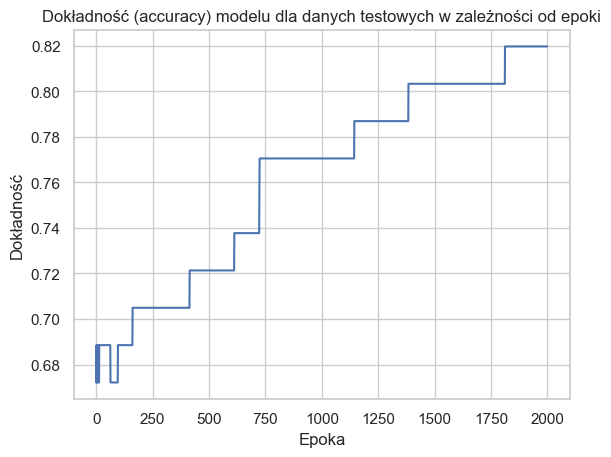

In [21]:
plt.plot(acc)
plt.title("Dokładność (accuracy) modelu dla danych testowych w zależności od epoki")
plt.xlabel("Epoka")
plt.ylabel("Dokładność")
print(f"Ostateczna dokładność modelu: {acc[-1]}")
plt.show

Wraz ze wzrostem Epok zauważalny jest wzrost skuteczności modelu na zbiorze testowym. Osiągnięto skuteczność na poziomie 0.84

              precision    recall  f1-score   support

         0.0       0.74      0.97      0.84        29
         1.0       0.96      0.69      0.80        32

    accuracy                           0.82        61
   macro avg       0.85      0.83      0.82        61
weighted avg       0.85      0.82      0.82        61



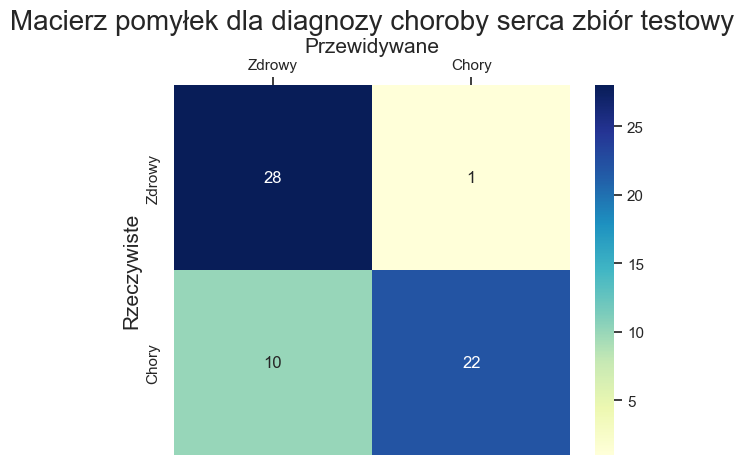

In [22]:
from sklearn.metrics import classification_report, confusion_matrix

def stats_conf_matrix(y_test, y_pred, label: str):
    labels = ['Zdrowy', 'Chory']
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap="YlGnBu", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Przewidywane', fontsize=15)
    plt.gca().xaxis.set_label_position('top')
    plt.gca().xaxis.tick_top()
    plt.ylabel('Rzeczywiste', fontsize=15)
    plt.title(f'Macierz pomyłek dla {label}', fontsize=20)
    plt.show()


y_pred_test = predict_batch(trained_weights, bias, X_test)
y_pred_sick_or_not = sick_or_not(y_pred_test)

stats_conf_matrix(y_test, y_pred_sick_or_not, "diagnozy choroby serca zbiór testowy")


Model dobrze radzi sobie z identyfikacją osób zdrowych (28 poprawnych predykcji z 29), niestety popełnia więcej błędów przy identyfikacji osób chorych (10 fałszywie negatywnych przypadków).


              precision    recall  f1-score   support

         0.0       0.77      0.93      0.84       135
         1.0       0.88      0.64      0.75       107

    accuracy                           0.81       242
   macro avg       0.83      0.79      0.79       242
weighted avg       0.82      0.81      0.80       242



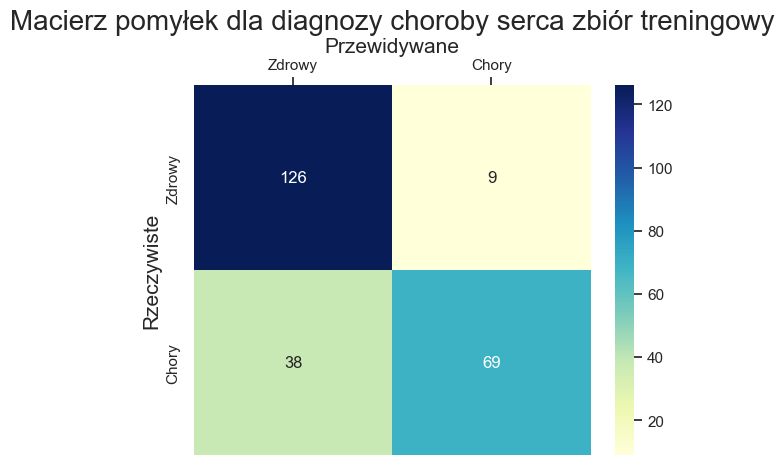

In [23]:
y_pred_train = sick_or_not(predict_batch(trained_weights, bias, X_train))
stats_conf_matrix(y_train, y_pred_train, "diagnozy choroby serca zbiór treningowy")


Porównując skuteczność modelu na zbiorach testowych i treningowych zauważalna jest większa dokładność dla danych testowych. Z tego powodu postanowiono powtórzyć trenowanie zwiększając maksymalną liczbę iteracji.  

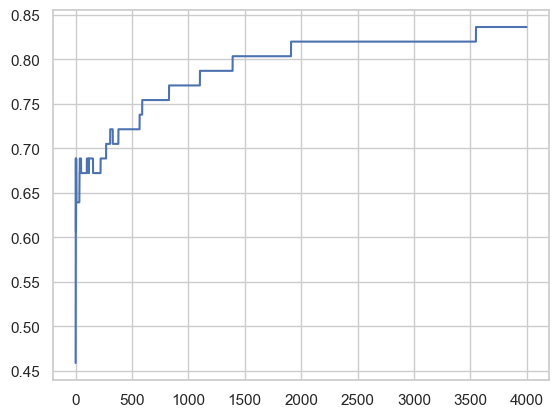

In [24]:
trained_weights, bias, acc = train(X_train, y_train, X_test, y_test, max_iter=4_000, alpha=LEARNING_RATE)
plt.plot(acc)

In [25]:
y_pred_test = predict_batch(trained_weights, bias, X_test)
y_pred_sick_or_not = sick_or_not(y_pred_test)

print(classification_report(y_test, y_pred_sick_or_not))


              precision    recall  f1-score   support

         0.0       0.76      0.97      0.85        29
         1.0       0.96      0.72      0.82        32

    accuracy                           0.84        61
   macro avg       0.86      0.84      0.83        61
weighted avg       0.86      0.84      0.83        61



In [26]:
y_pred_train = sick_or_not(predict_batch(trained_weights, bias, X_train))
print(classification_report(y_train, y_pred_train))


              precision    recall  f1-score   support

         0.0       0.78      0.94      0.85       135
         1.0       0.90      0.66      0.76       107

    accuracy                           0.82       242
   macro avg       0.84      0.80      0.81       242
weighted avg       0.83      0.82      0.81       242



Ostatecznie udało się zwiększyć dokładność na zbiorze testowym do 0.84, natomiast na zbiorze treningowym nadal wartość ta jest mniejsza. Możliwe więc że istnieją nie liniowe zależności powodujące pogorszenie wyników na większej próbie danych.

# Trenowanie z trybem paczkowania

In [27]:
from sklearn.utils import shuffle

def update_weights_batch(W: np.array, p_x: Number, y_expected: Number, X: np.array, alpha:Number=LEARNING_RATE):
    W -= alpha * np.average(gradient(p_x, y_expected, X), axis=0)


def batch_train(X_train, y_train, X_test, y_test, max_iter=MAX_ITER, alpha=LEARNING_RATE, batch_count=1):
    """
        Trains by batch and updates weights
        Returns weights, bias and accumulated average training accuracy
    """
    acc = []
    weights = np.random.rand(X_train.shape[1])
    bias = np.random.rand()
    X_batches = np.array_split(X_train, batch_count)
    y_batches = np.array_split(y_train, batch_count)

    for i in range(max_iter):
        for X, y_expected in zip(X_batches, y_batches):
            prob = predict_batch(weights, bias, X)
            weights -= alpha * X.T @ (prob-y_expected) / X.shape[0]
            bias -= alpha * np.mean(prob-y_expected)
        acc.append(accuracy_score(y_test, predict_batch_binary(weights, bias, X_test)))
    
    return weights, bias, acc



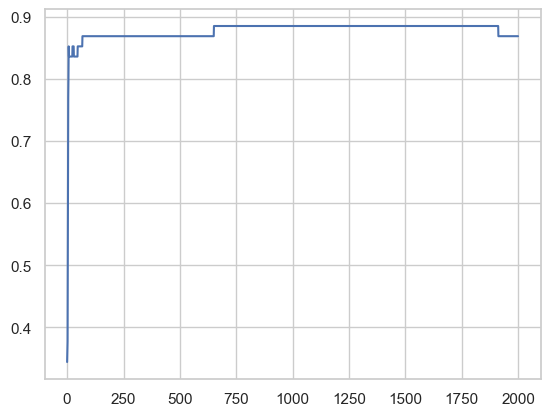

In [28]:
trained_weights, bias, acc = batch_train(X_train, y_train, X_test, y_test, batch_count=80, max_iter=2000)
plt.plot(acc)



In [29]:
y_pred_test = predict_batch(trained_weights, bias, X_test)
y_pred_sick_or_not = sick_or_not(y_pred_test)

print(classification_report(y_test, y_pred_sick_or_not))


              precision    recall  f1-score   support

         0.0       0.84      0.90      0.87        29
         1.0       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



Tryb paczkowanie (4 elementy) wpłynął na prędkość obliczeń oraz w mniej Epok osiągnął lepszy wynik dokładności 0.87 (W przypadku modelu bez trybu paczkowania było to 0.83 w epoce 2000). Zauważalne jest szybszy wzrost dokładności względem epok, maksymalna wartość uzyskiwana jest niemalże błyskawicznie (w stosunku do modelu bez trybu paczkowania). Możliwe że wagi zostały wylosowane w pobliżu minimum lokalnego co spowodowało szybkie znalezienie maksimum funkcji strat

# Skalowanie danych wejściowych
Postanowiono również sprawdzić zachowanie modelu w przypadku zastosowania wcześniej przygotowanego, zbioru zawierającego dane wejściowe przeskalowane metodą MinMax 

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84        29
         1.0       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



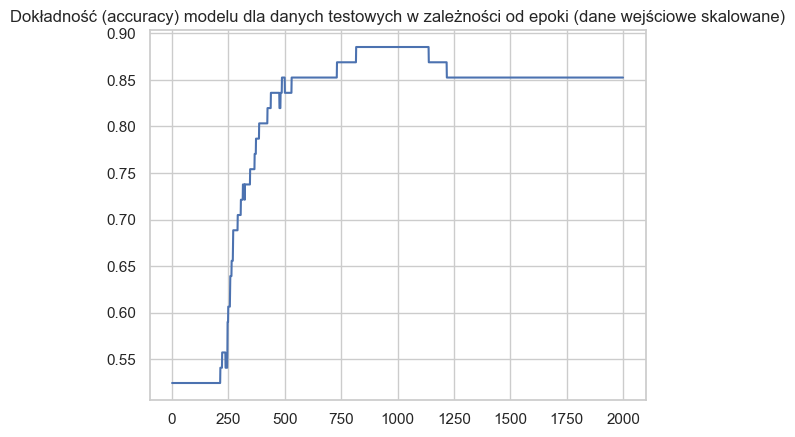

In [30]:
X_scaled_train, X_scaled_test, y_train, y_test = train_test_split(X_repr_scaled_np, y_repr_healtht_sick_np, test_size=0.2, random_state=42)

trained_weights, bias, acc = batch_train(X_scaled_train, y_train, X_scaled_test, y_test, batch_count=80, max_iter=2000)
plt.plot(acc)
plt.title("Dokładność (accuracy) modelu dla danych testowych w zależności od epoki (dane wejściowe skalowane)")

y_pred_test = predict_batch(trained_weights, bias, X_scaled_test)
y_pred_sick_or_not = sick_or_not(y_pred_test)
print(classification_report(y_test, y_pred_sick_or_not))

Zauważalna jest nieznaczna poprawa modelu do 0.89. Zmniejszeniu uległo tempo wzrostu dokładności modelu względem epok.

              precision    recall  f1-score   support

         0.0       0.86      0.83      0.84        29
         1.0       0.85      0.88      0.86        32

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



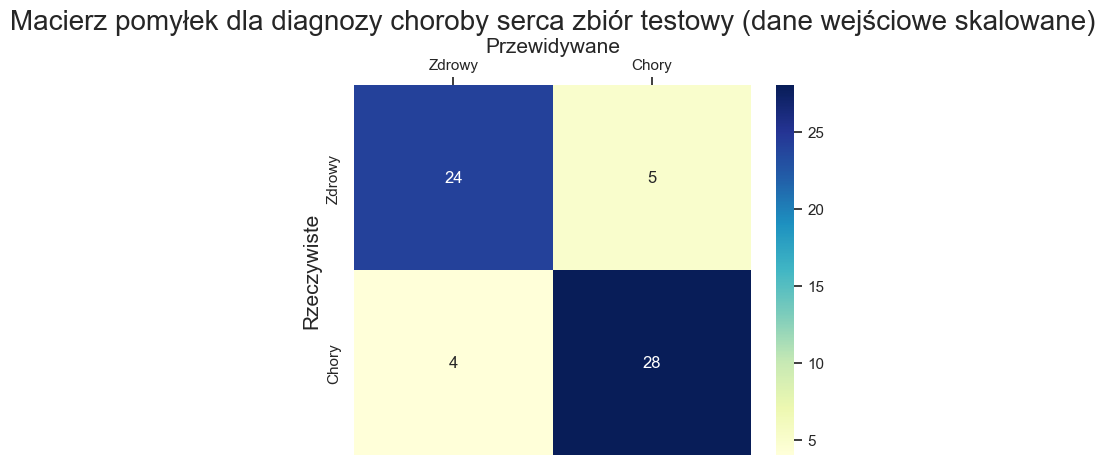

In [31]:
stats_conf_matrix(y_test, y_pred_sick_or_not, "diagnozy choroby serca zbiór testowy (dane wejściowe skalowane)")

W przeciwieństwie do modelu nie wykorzystującego trybu paczkowania. Zmalała liczba false negative (z 10 do 3) i wzrosła liczba false postive (z 1 do 4). W przypadku zastosowań medycznych malejąca liczba fałszywie negatywnych wyników jest ważniejsza niż wzrost liczby fałszywych wyników pozytywnych (do pewnego rozsądnego poziomu). Gdyż może to skutkować przeoczeniem chorob. Fałszywie pozytywne wyniki można zweryfikować dodatkowymi badaniami, natomiast przypadki fałszywie negatywne mogą skończyć się uszczerbkiem na zdrowiu lub nawet śmiercią pacjenta.

# Zadanie 3 

In [158]:

def initialize_weights_neural_network(input_size, hidden_sizes, output_size):
    weights = []
    biases = []
    layer_sizes = [input_size] + hidden_sizes + [output_size]

    for i in range(len(layer_sizes)-1):
        layer_i = layer_sizes[i]
        layer_i_1 = layer_sizes[i+1]
        weights.append(np.random.rand(layer_i, layer_i_1))
        biases.append(np.random.rand(layer_i_1))
    return weights, biases


def sigmoid_derivative(y):
    """Derivative of sigmoid func where y = sigmoid'(x)"""
    return y * (1 - y)

def forward(X, weights, biases):
    cache_X = X
    activations = [cache_X]
    for i in range(len(weights)):
        z = np.dot(cache_X, weights[i]) + biases[i]
        cache_X = sigmoid(z)
        activations.append(cache_X)
    return cache_X, activations

def backward(delta_next, activation, weights):
    """Calculates gradients for weights, biases, and delta for the previous layer"""    
    delta = np.dot(delta_next, weights.T,) * sigmoid_derivative(activation)
    return delta


def backward_all(X, y, weights, activations):
    delta_cache = (activations[-1] - y.reshape(-1, 1)) 
    derivatives = [delta_cache]
    for i in range(len(weights)-1, 0, -1):
        delta_cache = backward(delta_cache, activations[i], weights[i])
        derivatives.append(delta_cache)
    derivatives.reverse()
    return derivatives

def create_batches(X, y, batch_size):
    """Create batches from input data"""
    X, y = np.array(X), np.array(y)  
    indices = np.random.permutation(len(X))  
    for i in range(0, len(X), batch_size):
        batch_idx = indices[i:i + batch_size]
        yield X[batch_idx], y[batch_idx]

def nn_predict(X, weights, biasess):
    return forward(X, weights, biasess)[0]

def train_neural_network(X_train, y_train, X_test, y_test, hidden_sizes, max_iter=MAX_ITER, alpha=LEARNING_RATE, batch_size=1):
    weights, biasess = initialize_weights_neural_network(X_train.shape[1], hidden_sizes, 1)
    acc = []
    for i in range(max_iter):
        if i % 100 == 0:
            print('-'*10)
            print(f"epoch {i}")

        batches = list(create_batches(X_train, y_train, batch_size))
        for X, y in batches:
            
            y_pred, activations = forward(X, weights, biasess)

            gradients = backward_all(X, y, weights, activations)
            
            for i in range(len(weights)):
                weight_gradient = np.dot(activations[i].T, gradients[i]) / batch_size
                bias_gradient = np.mean(gradients[i], axis=0, keepdims=False)
                
                weights[i] -= alpha * weight_gradient
                biasess[i] -= alpha * bias_gradient

        
        y_pred, _ = forward(X_test, weights, biasess)
        acc.append(accuracy_score(y_test, y_pred > 0.5))

    return weights, biasess, acc

X_train, X_test, y_train, y_test = train_test_split(X_repr_scaled_np, y_repr_healtht_sick_np, test_size=0.2, random_state=42)
# X_train_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# y_train_xor = np.array([0, 1, 1, 0])
trained_weights, biasess, acc = train_neural_network(X_train, y_train, X_test, y_test, hidden_sizes=[2], max_iter=5_000, alpha=0.001)

----------
epoch 0
----------
epoch 100
----------
epoch 200
----------
epoch 300
----------
epoch 400
----------
epoch 500
----------
epoch 600
----------
epoch 700
----------
epoch 800
----------
epoch 900
----------
epoch 1000
----------
epoch 1100
----------
epoch 1200
----------
epoch 1300
----------
epoch 1400
----------
epoch 1500
----------
epoch 1600
----------
epoch 1700
----------
epoch 1800
----------
epoch 1900
----------
epoch 2000
----------
epoch 2100
----------
epoch 2200
----------
epoch 2300
----------
epoch 2400
----------
epoch 2500
----------
epoch 2600
----------
epoch 2700
----------
epoch 2800
----------
epoch 2900
----------
epoch 3000
----------
epoch 3100
----------
epoch 3200
----------
epoch 3300
----------
epoch 3400
----------
epoch 3500
----------
epoch 3600
----------
epoch 3700
----------
epoch 3800
----------
epoch 3900
----------
epoch 4000
----------
epoch 4100
----------
epoch 4200
----------
epoch 4300
----------
epoch 4400
----------
epoch 4500


Text(0.5, 1.0, 'Dokładność (accuracy) modelu dla danych testowych w zależności od epoki (dane wejściowe skalowane) - 1 warstwa ukryta 2 neruony')

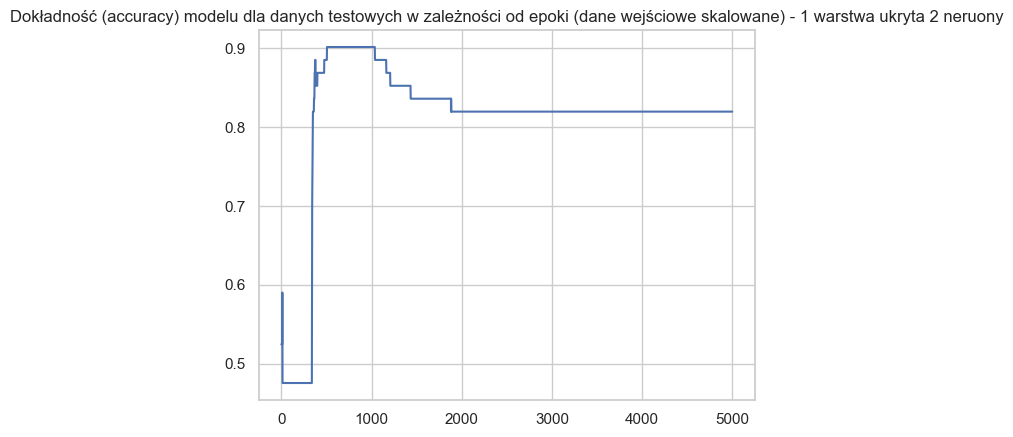

In [159]:
plt.plot(acc)
plt.title("Dokładność (accuracy) modelu dla danych testowych w zależności od epoki (dane wejściowe skalowane) - 1 warstwa ukryta 2 neruony")


              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80        29
         1.0       0.80      0.88      0.84        32

    accuracy                           0.82        61
   macro avg       0.82      0.82      0.82        61
weighted avg       0.82      0.82      0.82        61



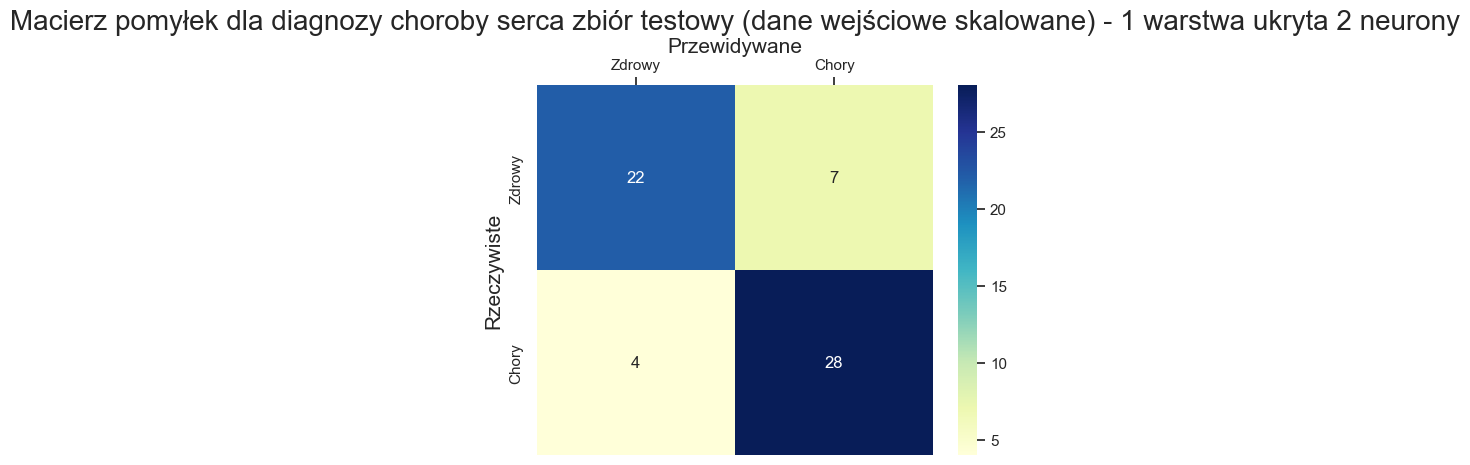

In [160]:
predict = nn_predict(X_test, trained_weights, biasess)
stats_conf_matrix(y_test, y_pred, "diagnozy choroby serca zbiór testowy (dane wejściowe skalowane) - 1 warstwa ukryta 2 neurony")


In [174]:
def test_neural_network(X_train, y_train, X_test, y_test, hidden_sizes=[2, 2], max_iter=2000, alpha=0.001, title="Model info", batch_size=1):
    trained_weights, biasess, acc = train_neural_network(X_train, y_train, X_test, y_test, hidden_sizes, max_iter, alpha, batch_size)
    predict = nn_predict(X_test, trained_weights, biasess)
    stats_conf_matrix(y_test, predict > 0.5, f"{title}- {hidden_sizes} warstwy ukryte")
    return trained_weights, biasess, acc

### Test działania modelu dla wartości nieskalowanych

----------
epoch 0
----------
epoch 100
----------
epoch 200
----------
epoch 300
----------
epoch 400
----------
epoch 500
----------
epoch 600
----------
epoch 700
----------
epoch 800
----------
epoch 900
----------
epoch 1000
----------
epoch 1100
----------
epoch 1200
----------
epoch 1300
----------
epoch 1400
----------
epoch 1500
----------
epoch 1600
----------
epoch 1700
----------
epoch 1800
----------
epoch 1900
----------
epoch 2000
----------
epoch 2100
----------
epoch 2200
----------
epoch 2300
----------
epoch 2400
----------
epoch 2500
----------
epoch 2600
----------
epoch 2700
----------
epoch 2800
----------
epoch 2900
              precision    recall  f1-score   support

         0.0       0.48      1.00      0.64        29
         1.0       0.00      0.00      0.00        32

    accuracy                           0.48        61
   macro avg       0.24      0.50      0.32        61
weighted avg       0.23      0.48      0.31        61



C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

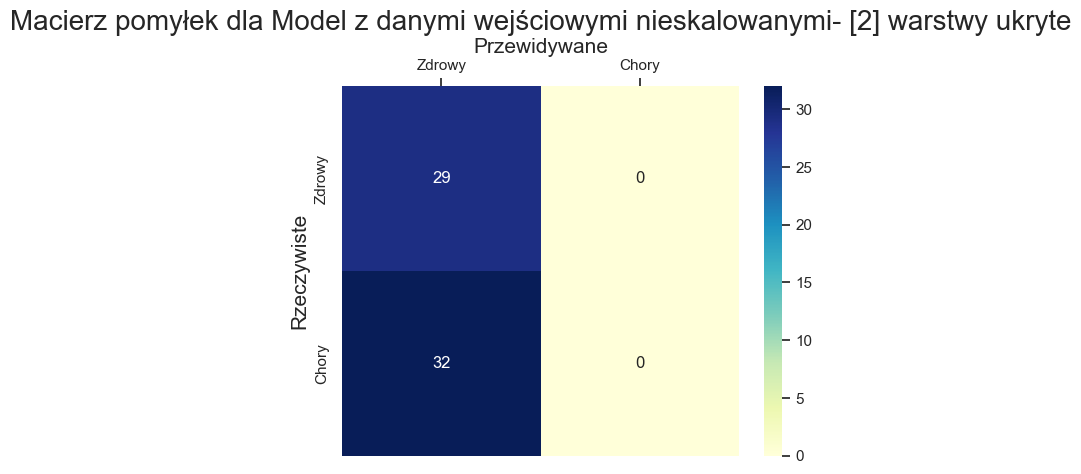

In [168]:
X_train_no_scaled, X_test_no_scaled, y_train_no_scaled, y_test_no_scaled = train_test_split(X_repr, y_repr_healtht_sick_np, test_size=0.2, random_state=42)
_, _, acc = test_neural_network(
    X_train_no_scaled,
    y_train_no_scaled,
    X_test_no_scaled,
    y_test_no_scaled,
    hidden_sizes=[2],
    max_iter=3_000,
    alpha=0.001,
    title="Model z danymi wejściowymi nieskalowanymi")

Text(0.5, 1.0, 'Dokładność (accuracy) modelu dla danych testowych w zależności od epoki (dane wejściowe NIE skalowane) - 1 warstwa ukryta 2 neruony')

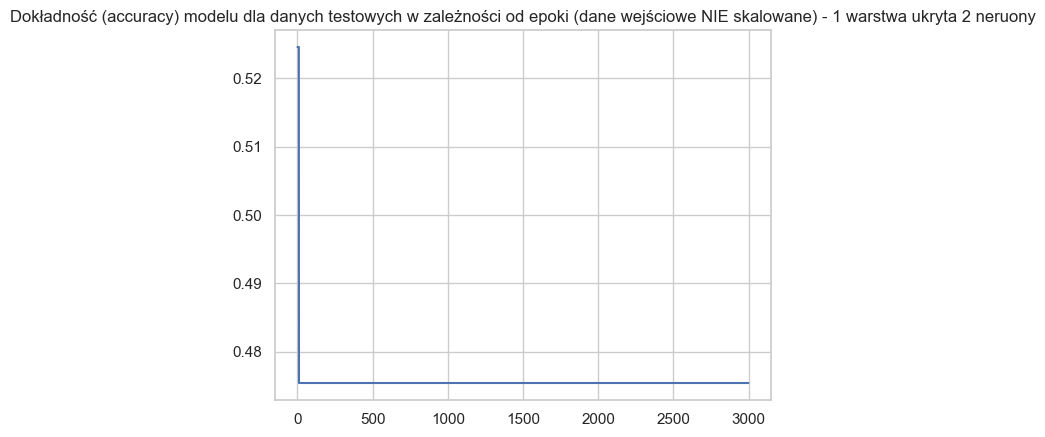

In [170]:
plt.plot(acc)
plt.title("Dokładność (accuracy) modelu dla danych testowych w zależności od epoki (dane wejściowe NIE skalowane) - 1 warstwa ukryta 2 neruony")


W przypadku wartości nieskalowanych wyuczenie modelu okazało się trudniejsze, niewystąpiło nagły wzrost dokładności zauważalne w modelu z wartościami skalowanymi (występujący ok. epoki 500). Spowodowane jest to nierównomierną aktywnością neuronów w modelu (wartości wyższe mają dużo większy wpływ na końcowy wynik)

### Test działania modelu dla różnych współczynników uczenia

$\alpha =0.0001$

----------
epoch 0
----------
epoch 100
----------
epoch 200
----------
epoch 300
----------
epoch 400
----------
epoch 500
----------
epoch 600
----------
epoch 700
----------
epoch 800
----------
epoch 900
----------
epoch 1000
----------
epoch 1100
----------
epoch 1200
----------
epoch 1300
----------
epoch 1400
----------
epoch 1500
----------
epoch 1600
----------
epoch 1700
----------
epoch 1800
----------
epoch 1900
----------
epoch 2000
----------
epoch 2100
----------
epoch 2200
----------
epoch 2300
----------
epoch 2400
----------
epoch 2500
----------
epoch 2600
----------
epoch 2700
----------
epoch 2800
----------
epoch 2900
              precision    recall  f1-score   support

         0.0       0.48      1.00      0.64        29
         1.0       0.00      0.00      0.00        32

    accuracy                           0.48        61
   macro avg       0.24      0.50      0.32        61
weighted avg       0.23      0.48      0.31        61



C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

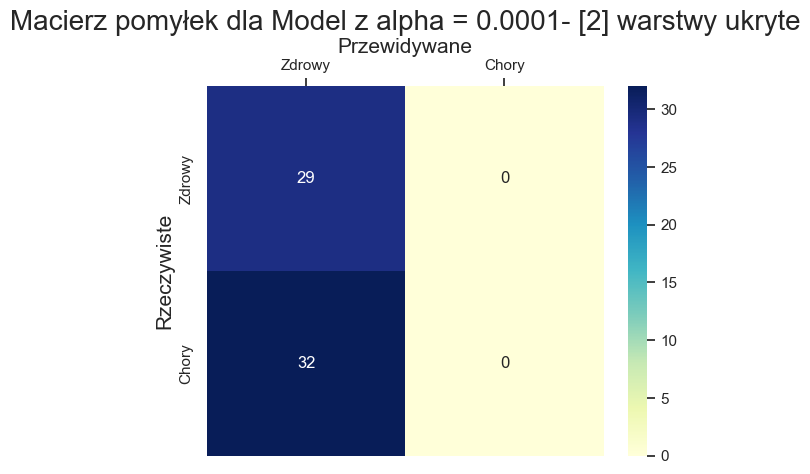

In [185]:
_, _, acc = test_neural_network(
    X_train,
    y_train,
    X_test,
    y_test,
    hidden_sizes=[2],
    max_iter=3_000,
    alpha=0.0001,
    title="Model z alpha = 0.0001", batch_size=1)

Text(0.5, 1.0, 'Dokładność (accuracy) modelu dla danych testowych w zależności od epoki (dane wejściowe skalowane) - 1 warstwa ukryta 2 neruony, alpha=0.0001')

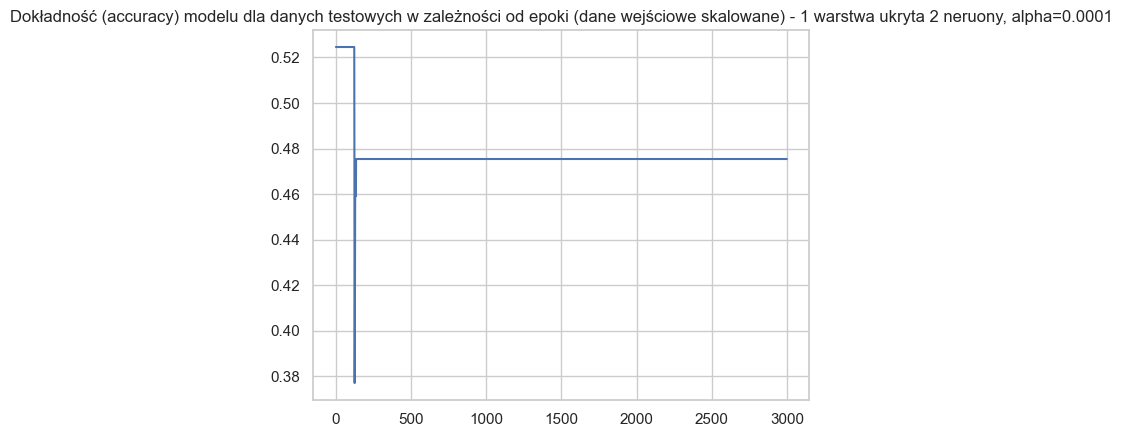

In [186]:
plt.plot(acc)
plt.title("Dokładność (accuracy) modelu dla danych testowych w zależności od epoki (dane wejściowe skalowane) - 1 warstwa ukryta 2 neruony, alpha=0.0001")

$\alpha=0.1$

----------
epoch 0
----------
epoch 100
----------
epoch 200
----------
epoch 300
----------
epoch 400
----------
epoch 500
----------
epoch 600
----------
epoch 700
----------
epoch 800
----------
epoch 900
----------
epoch 1000
----------
epoch 1100
----------
epoch 1200
----------
epoch 1300
----------
epoch 1400
              precision    recall  f1-score   support

         0.0       0.81      0.76      0.79        29
         1.0       0.79      0.84      0.82        32

    accuracy                           0.80        61
   macro avg       0.80      0.80      0.80        61
weighted avg       0.80      0.80      0.80        61



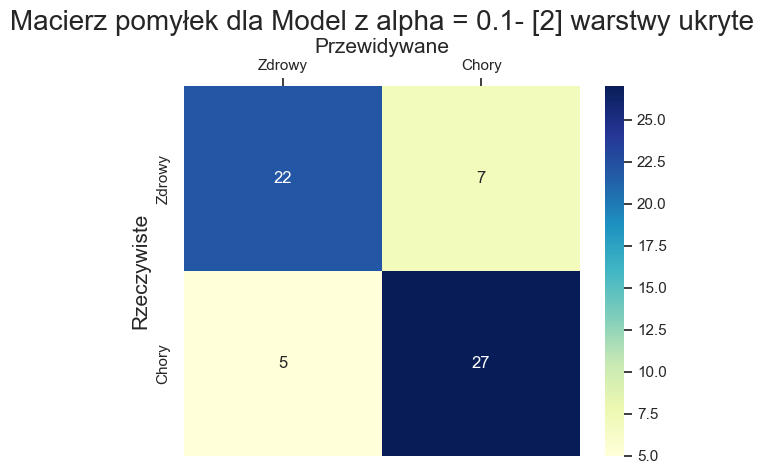

In [189]:
_, _, acc = test_neural_network(
    X_train,
    y_train,
    X_test,
    y_test,
    hidden_sizes=[2],
    max_iter=1_500,
    alpha=0.1,
    title="Model z alpha = 0.1", batch_size=1)

Text(0.5, 1.0, 'Dokładność (accuracy) modelu dla danych testowych w zależności od epoki (dane wejściowe skalowane) - 1 warstwa ukryta 2 neruony, alpha=0.1')

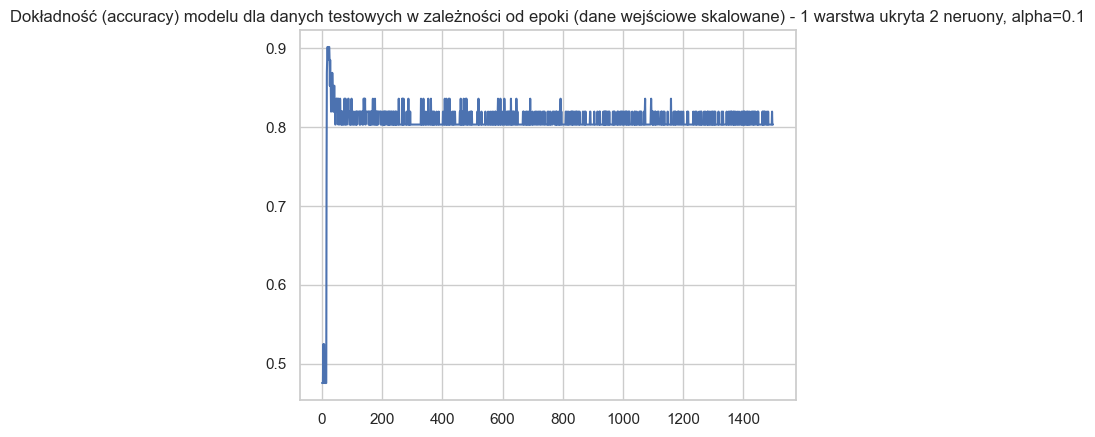

In [190]:
plt.plot(acc)
plt.title("Dokładność (accuracy) modelu dla danych testowych w zależności od epoki (dane wejściowe skalowane) - 1 warstwa ukryta 2 neruony, alpha=0.1")

Zwiększenie wspólczynnika uczenia $\alpha$ do 0.1 spowodowało szybszy wzrost accuracy (w stosunku do bazowego $\alpha=0.001$). W dalszych epokoach (>100)
występują większe szumy wynikające najprawdopodobniej z przeskoków w pobliżu minimum lokalnego. W przypadku zmniejszenia współczynnika uczenia do 0.0001 model prawdopodbnie znalazł się w nieporządanym punkcie (gradienty zbiegły do 0 - min. lok / punkt siodłowy). Co w połączeniu z niewielkim współczynnikiem $\alpha$ uniemożliwło jego opuszczenie

## Testy dla różnych warstw ukrytych

----------
epoch 0
----------
epoch 100
----------
epoch 200
----------
epoch 300
----------
epoch 400
----------
epoch 500
----------
epoch 600
----------
epoch 700
----------
epoch 800
----------
epoch 900
----------
epoch 1000
----------
epoch 1100
----------
epoch 1200
----------
epoch 1300
----------
epoch 1400
----------
epoch 1500
----------
epoch 1600
----------
epoch 1700
----------
epoch 1800
----------
epoch 1900
----------
epoch 2000
----------
epoch 2100
----------
epoch 2200
----------
epoch 2300
----------
epoch 2400
----------
epoch 2500
----------
epoch 2600
----------
epoch 2700
----------
epoch 2800
----------
epoch 2900
              precision    recall  f1-score   support

         0.0       0.48      1.00      0.64        29
         1.0       0.00      0.00      0.00        32

    accuracy                           0.48        61
   macro avg       0.24      0.50      0.32        61
weighted avg       0.23      0.48      0.31        61



C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\dawid\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classificati

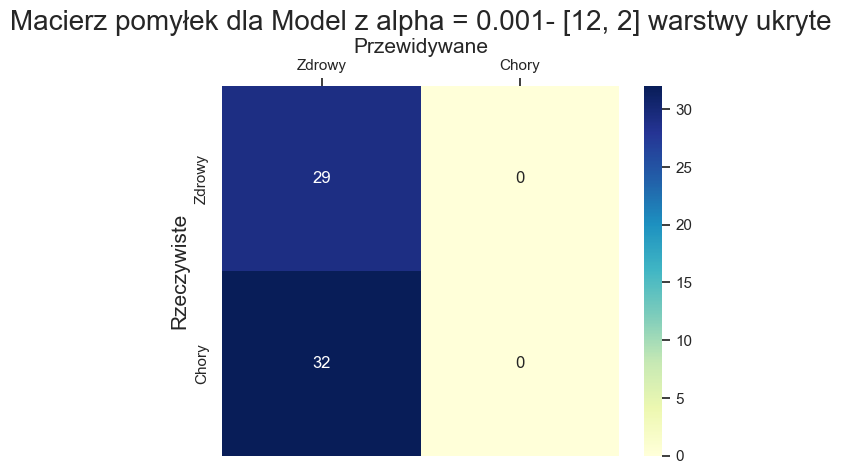

In [191]:
_, _, acc = test_neural_network(
    X_train,
    y_train,
    X_test,
    y_test,
    hidden_sizes=[12, 2],
    max_iter=3_000,
    alpha=0.001,
    title="Model z alpha = 0.001", batch_size=1)

Text(0.5, 1.0, 'Dokładność (accuracy) modelu dla danych testowych w zależności od epoki (dane wejściowe skalowane) - 2 warstwy ukryte 12, 2 neurony, alpha=0.001')

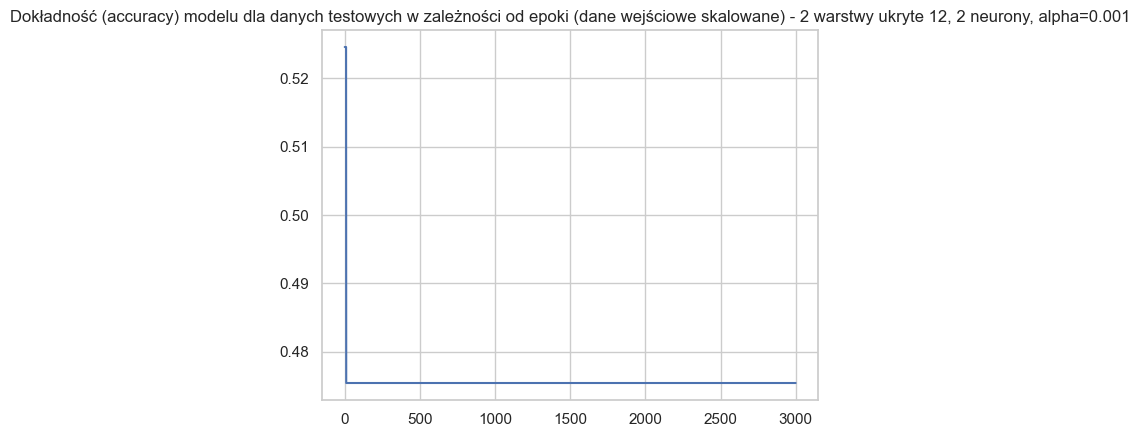

In [192]:
plt.plot(acc)
plt.title("Dokładność (accuracy) modelu dla danych testowych w zależności od epoki (dane wejściowe skalowane) - 2 warstwy ukryte 12, 2 neurony, alpha=0.001")

----------
epoch 0
----------
epoch 100
----------
epoch 200
----------
epoch 300
----------
epoch 400
----------
epoch 500
----------
epoch 600
----------
epoch 700
----------
epoch 800
----------
epoch 900
----------
epoch 1000
----------
epoch 1100
----------
epoch 1200
----------
epoch 1300
----------
epoch 1400
----------
epoch 1500
----------
epoch 1600
----------
epoch 1700
----------
epoch 1800
----------
epoch 1900
----------
epoch 2000
----------
epoch 2100
----------
epoch 2200
----------
epoch 2300
----------
epoch 2400
----------
epoch 2500
----------
epoch 2600
----------
epoch 2700
----------
epoch 2800
----------
epoch 2900
              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86        29
         1.0       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



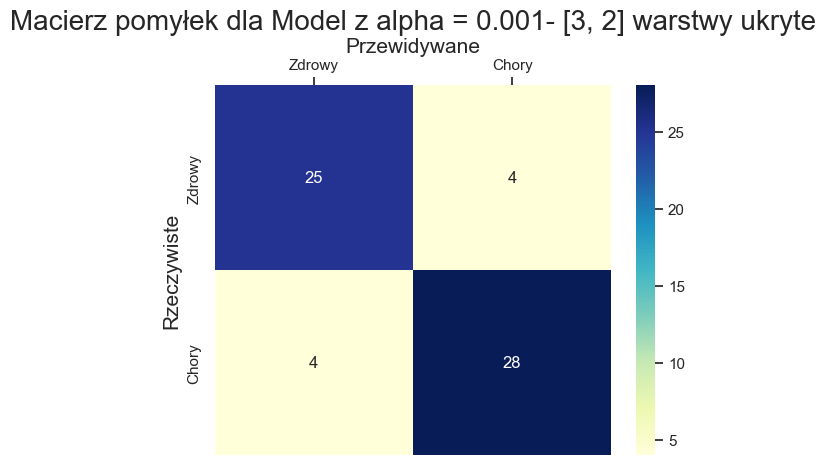

In [193]:
_, _, acc = test_neural_network(
    X_train,
    y_train,
    X_test,
    y_test,
    hidden_sizes=[3, 2],
    max_iter=3_000,
    alpha=0.001,
    title="Model z alpha = 0.001", batch_size=1)

In [ ]:
plt.plot(acc)
plt.title("Dokładność (accuracy) modelu dla danych testowych w zależności od epoki (dane wejściowe skalowane) - 2 warstwy ukryte 3, 2 neurony, alpha=0.001")

plt.plot